In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Try reading the CSV with a different encoding
try:
    df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908_to_2023.csv", encoding='latin-1')
except UnicodeDecodeError:
    # If latin-1 fails, try cp1252
    df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908_to_2023.csv", encoding='cp1252')

df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


1. Data Import and Cleaning:

Import the dataset using Pandas.
Clean and preprocess the data, addressing missing values and categorizing data as needed.
Convert dates and other relevant fields to appropriate formats.

In [ ]:
print(df.isnull().sum())

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     777
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64


In [ ]:
print(df.columns)

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [ ]:
df = df.drop(['Time'], axis=1)
df = df.drop(['Flight #'],  axis=1)
df = df.drop(['Route'], axis=1)
df = df.drop(['Registration'], axis=1)
df = df.drop(['cn/ln'], axis=1)

In [ ]:
#Grouping categories of Military-use airplanes: if there is a key word Militay in group Operator
# Handle missing values first
df['Operator'] = df['Operator'].fillna('Unknown')

df['Operator_Category'] = df['Operator'].apply(lambda x: 'Military' if 'Military' in x else 'Civilian')
df[['Operator', 'Operator_Category']].head()

,Operator,Operator_Category
0,Military - U.S. Army,Military
1,Unknown,Civilian
2,Military - U.S. Navy,Military
3,Private,Civilian
4,Military - German Navy,Military


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
df.isnull().sum()

,0
Date,0
Location,4
Operator,0
AC Type,15
Aboard,18
Aboard Passangers,229
Aboard Crew,226
Fatalities,8
Fatalities Passangers,242
Fatalities Crew,241


2. Exploratory Data Analysis:

Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.
Analyze the frequency of crashes over time to identify any trends.

In [ ]:
df['Aboard'] = df['Aboard'].fillna(0)
df['Fatalities'] = df['Fatalities'].fillna(0)
df['Survivors'] = df['Aboard'] - df['Fatalities']
df[['Aboard', 'Fatalities', 'Survivors']].head()
df['Operator_Category'].value_counts()

,count
Operator_Category,
Civilian,4244
Military,754


In [ ]:
df['Survival Rate (%)'] = (df['Survivors'] / df['Aboard']) * 100
df['Fatality Rate (%)'] = (df['Fatalities'] / df['Aboard']) * 100
df[['Aboard', 'Fatalities', 'Survivors', 'Survival Rate (%)', 'Fatality Rate (%)']].head()

,Aboard,Fatalities,Survivors,Survival Rate (%),Fatality Rate (%)
0,2.0,1.0,1.0,50.0,50.0
1,1.0,1.0,0.0,0.0,100.0
2,5.0,5.0,0.0,0.0,100.0
3,1.0,1.0,0.0,0.0,100.0
4,20.0,14.0,6.0,30.0,70.0


In [ ]:
df['Year'] = df['Date'].dt.year
crashes_per_year = df['Year'].value_counts().sort_index()
crashes_per_year

,count
Year,
1908,1
1909,1
1912,1
1913,3
1915,2
...,...
2019,13
2020,8
2021,9


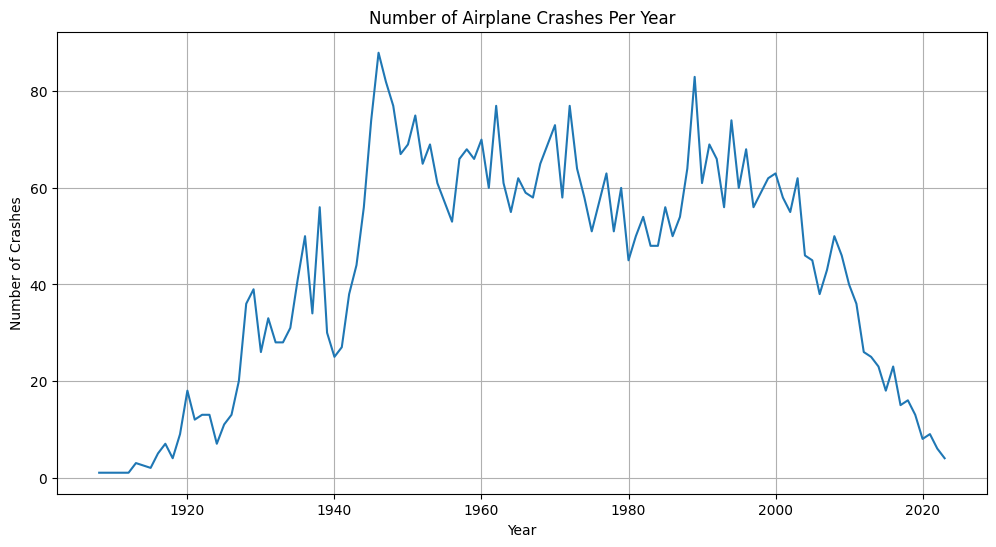

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
crashes_per_year.plot(kind='line')
plt.title('Number of Airplane Crashes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

Answer: As can be seen from the chart, there was a clear higher airplane crash number between 1940s and year 2000.

In [ ]:
crashes_military_per_year = df[df['Operator_Category'] == 'Military']['Year'].value_counts().sort_index()
crashes_military_per_year

,count
Year,
1908,1
1912,1
1913,2
1915,2
1916,5
...,...
2017,1
2018,3
2019,2


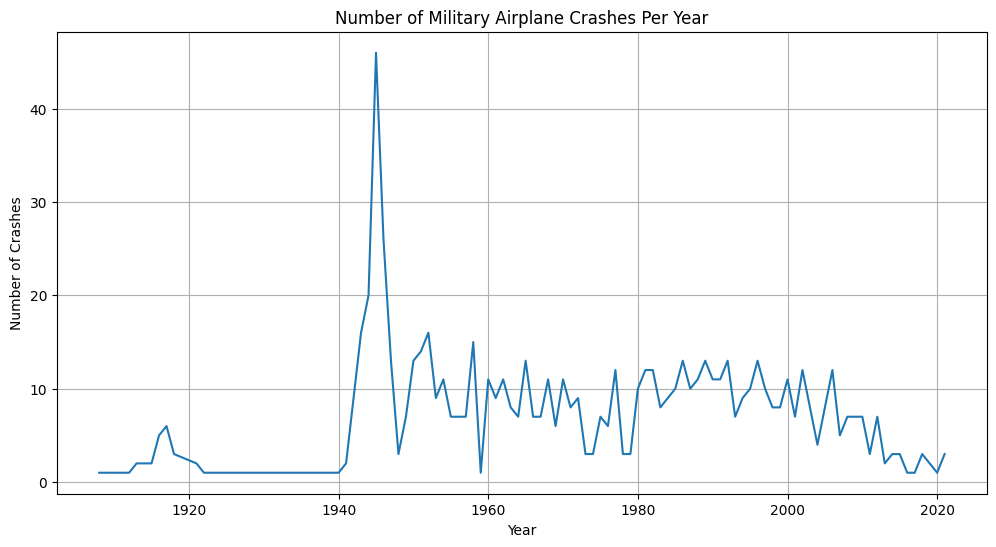

In [ ]:
plt.figure(figsize=(12,6))
crashes_military_per_year.plot(kind='line')
plt.title('Number of Military Airplane Crashes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

Answer: As can be seen from the chart above, Military airplane crash has a particular peak around year 1945. Apart from that, the overall higher crash number is apparantly higher from 1940s to 2010 than the period before 1940, or after 2010.

---



3. Statistical Analysis:

Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.
Conduct a hypothesis test (e.g., comparing the average number of fatalities in different decades or regions).

In [ ]:
# to check survival rates to answer the question: “Are crashes becoming less deadly over time?”
survival_rate_clean = df['Survival Rate (%)'].replace([np.inf, -np.inf], np.nan).dropna()

mean_fatality_rate = stats.tmean(survival_rate_clean)
median_fatality_rate = np.median(survival_rate_clean)
variance_fatality_rate = stats.tvar(survival_rate_clean)
std_dev_fatality_rate = stats.tstd(survival_rate_clean)

print(f"Mean Survival Rate: {mean_fatality_rate:.2f}%")
print(f"Median Survival Rate: {median_fatality_rate:.2f}%")
print(f"Variance: {variance_fatality_rate:.2f}")
print(f"Standard Deviation: {std_dev_fatality_rate:.2f}")

Mean Survival Rate: 18.15%
Median Survival Rate: 0.00%
Variance: 971.72
Standard Deviation: 31.17


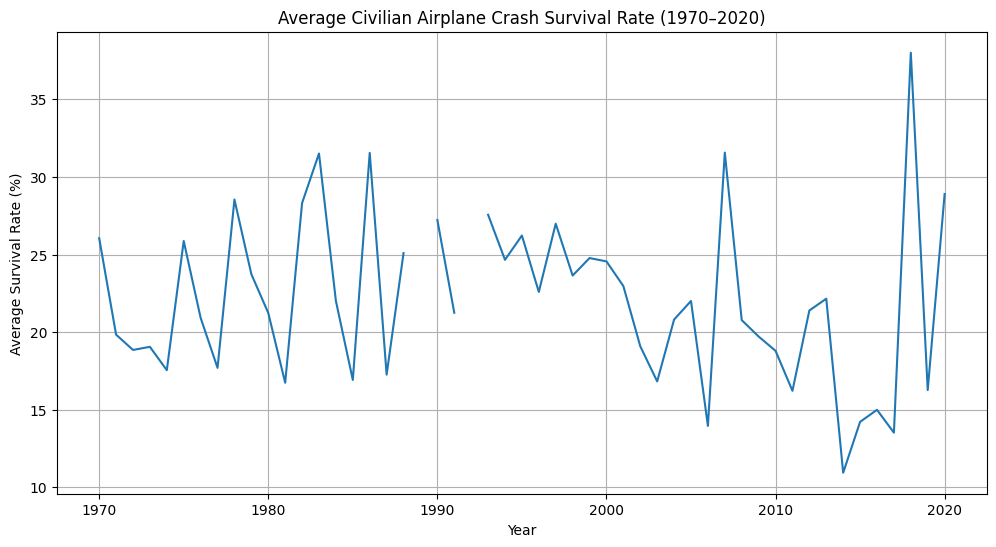

In [ ]:
# make sure 'Date' is datetime type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

# I only want to check the years 1970 to 2020 when technology improved and only civilian airplanes
civilian_df = df[
    (df['Year'] >= 1970) &
    (df['Year'] <= 2020) &
    (~df['Operator'].str.contains('Military', case=False, na=False))
]
#get rid of missing value
civilian_df = civilian_df.dropna(subset=['Survival Rate (%)'])

yearly_survival = civilian_df.groupby('Year')['Survival Rate (%)'].mean()

# visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(yearly_survival.index, yearly_survival.values)
plt.title('Average Civilian Airplane Crash Survival Rate (1970–2020)')
plt.xlabel('Year')
plt.ylabel('Average Survival Rate (%)')
plt.grid(True)
plt.show()

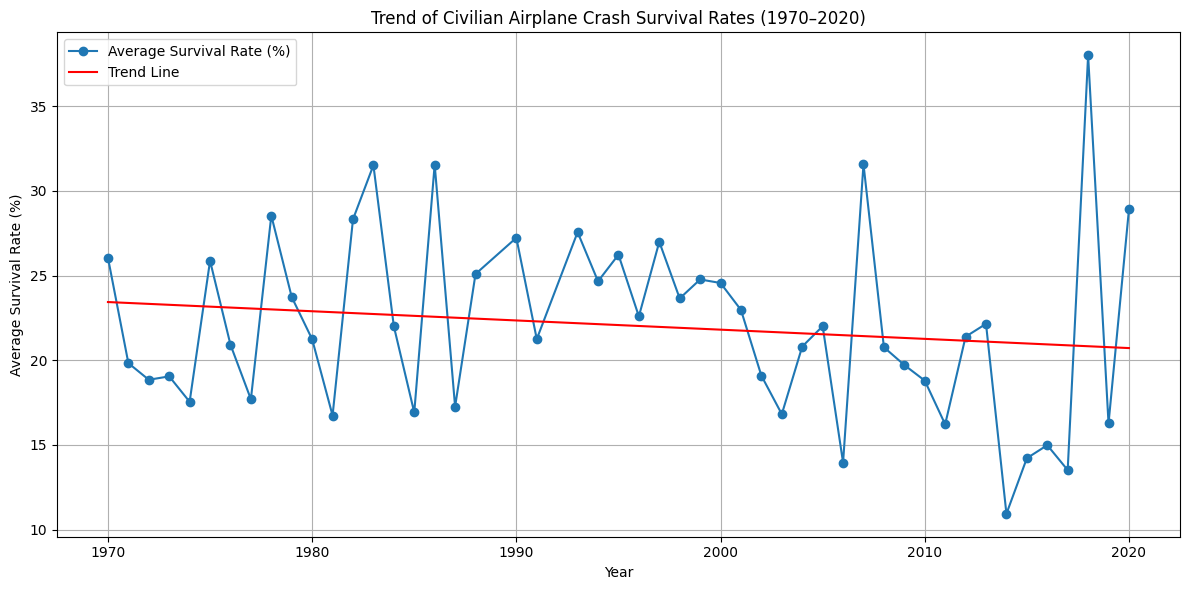

Slope: -0.0543
Intercept: 130.47
R-squared: 0.0223
P-value: 3.0607e-01


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 手动输入你的数据（或者从 DataFrame 中得到）
survival_data = {
    1970: 26.05, 1971: 19.83, 1972: 18.85, 1973: 19.05, 1974: 17.55,
    1975: 25.87, 1976: 20.92, 1977: 17.70, 1978: 28.54, 1979: 23.73,
    1980: 21.24, 1981: 16.74, 1982: 28.32, 1983: 31.51, 1984: 22.01,
    1985: 16.92, 1986: 31.55, 1987: 17.26, 1988: 25.09,
    1990: 27.23, 1991: 21.25, 1993: 27.56, 1994: 24.66,
    1995: 26.23, 1996: 22.59, 1997: 26.99, 1998: 23.65,
    1999: 24.77, 2000: 24.56, 2001: 22.97, 2002: 19.09,
    2003: 16.82, 2004: 20.81, 2005: 22.01, 2006: 13.96,
    2007: 31.57, 2008: 20.77, 2009: 19.72, 2010: 18.80,
    2011: 16.22, 2012: 21.39, 2013: 22.15, 2014: 10.94,
    2015: 14.22, 2016: 14.99, 2017: 13.52, 2018: 38.00,
    2019: 16.27, 2020: 28.90
}

# 转换为 DataFrame 并移除无效值
df_survival = pd.DataFrame(list(survival_data.items()), columns=['Year', 'SurvivalRate'])
df_survival = df_survival.replace([np.inf, -np.inf], np.nan).dropna()

# 回归分析
x = df_survival['Year']
y = df_survival['SurvivalRate']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# 可视化
plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', label='Average Survival Rate (%)')
plt.plot(x, slope * x + intercept, color='red', label='Trend Line')
plt.title("Trend of Civilian Airplane Crash Survival Rates (1970–2020)")
plt.xlabel("Year")
plt.ylabel("Average Survival Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 打印统计结果
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4e}")

slope is negative(-0.0543) which means the survival rate isnt rising but decreasing over time. P-value is bigger than 0.05 which means that it is just randomly fluctuated and not showing a trend.The R-squared value is 0.0223, indicating that only about 2.23% of the variation in survival rate is explained by the trend (time), which is very low.

Conclusion: There’s no strong evidence of a trend in the survival rate over time. The decline is minor and statistically insignificant.

Define the Hypothesis:
•	Null Hypothesis (H₀): There is no difference in the average number of fatalities between the 1980s and 2000s.

•	Alternative Hypothesis (H₁): There is a difference in the average number of fatalities between the 1980s and 2000s.

In [ ]:
df['Data'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

fatal_80s = df[(df['Year'] >= 1980) & (df['Year'] <= 1989)]['Fatalities'].dropna()
fatal_2000s = df[(df['Year'] >= 2000) & (df['Year'] <= 2009)]['Fatalities'].dropna()

from scipy.stats import ttest_ind

t_statistic, p_value = stats.ttest_ind(fatal_80s, fatal_2000s)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-statistic: 3.0635157641167265
P-value: 0.002242973423060483


✅ Interpretation:

	•	Since the p-value (0.0022) is less than 0.05, we reject the null hypothesis.

	•	This means that there is a statistically significant difference in the average number of fatalities between the 1980s and the 2000s.
  
	•	The positive T-statistic suggests that the average number of fatalities in the 1980s was higher than in the 2000s.

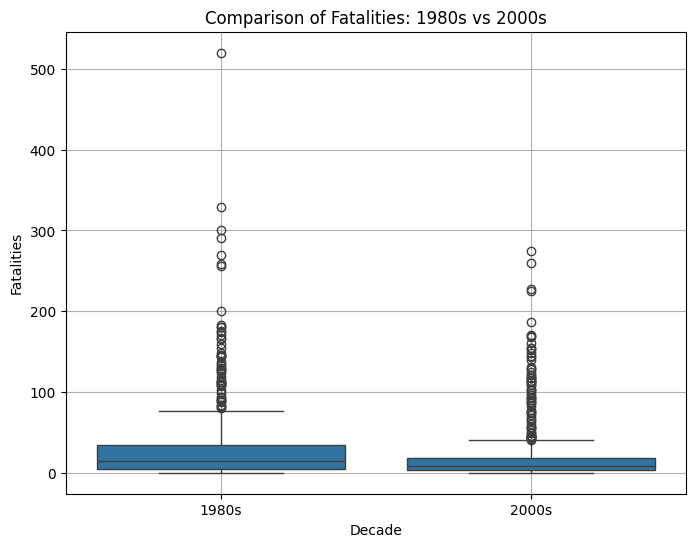

In [ ]:
compare_df = pd.DataFrame({
    'Fatalities': pd.concat([fatal_80s, fatal_2000s], ignore_index=True),
    'Decade': ['1980s'] * len(fatal_80s) + ['2000s'] * len(fatal_2000s)
})

plt.figure(figsize=(8, 6))
sns.boxplot(x='Decade', y='Fatalities', data=compare_df)
plt.title('Comparison of Fatalities: 1980s vs 2000s')
plt.grid(True)
plt.show()

4. Visualization:

Create charts and graphs using Matplotlib and Seaborn to visualize the findings from your exploratory data analysis and statistical tests.
Time series plots of crashes over years has been checked from above, as follows:

Examples might include time series plots of crashes over years, bar charts of crashes by region, and histograms of fatalities.

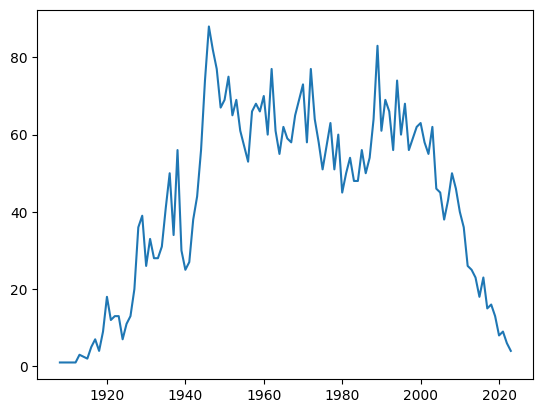

In [ ]:
plt.plot(crashes_per_year)

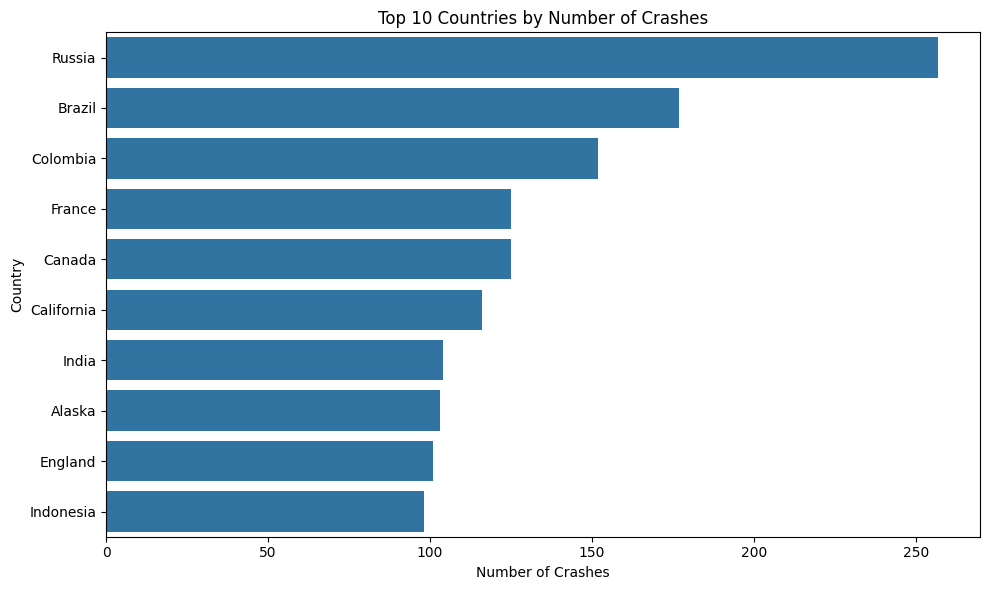

In [ ]:
df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip() if pd.notnull(x) else 'Unknown')
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Number of Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

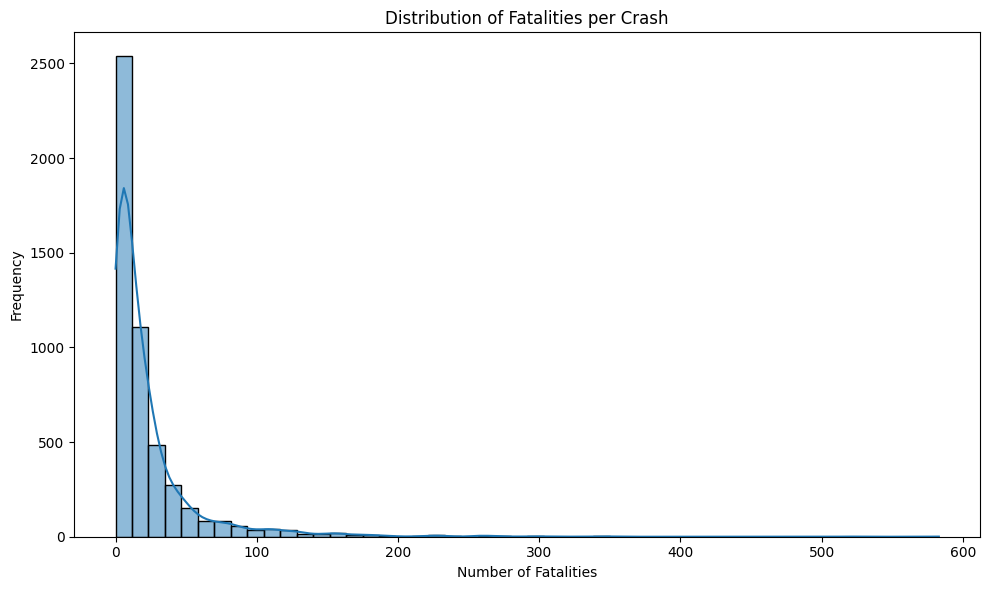

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Fatalities'], bins=50, kde=True)
plt.title('Distribution of Fatalities per Crash')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

5. Insight and Report:

Summarize your findings and provide insights into the patterns or anomalies discovered in the data.
Prepare a well-structured report including all code, visualizations, and interpretations.

<h1> Airplane Crashes and Fatalities up to 2023- Data analysis report: </h1>

**1. Data Import and Cleaning:**

	•	Imported the dataset using Pandas, handling encoding issues (latin-1, cp1252).

	•	Cleaned missing values in key columns like 'Aboard', 'Fatalities', 'Operator'.

	•	Dropped irrelevant columns ('Time', 'Route', 'Flight #', etc.).
  
	•	Created a new column 'Operator_Category' to distinguish between Civilian and Military aircraft.

	•	Converted 'Date' to datetime format and extracted the 'Year'.

**2. Exploratory Data Analysis (EDA)

	•	Calculated statistics: total crashes, fatalities, survival rates.

	•	Created new columns: 'Survivors', 'Survival Rate (%)', and 'Fatality Rate (%)'.

	•	Plotted:
	•	📈 Crashes per year.
	•	📈 Military crashes per year.
	•	📈 Average survival rate (civilian crashes, 1970–2020).

🔍 Insight: Peak in military crashes during WWII (~1945); civilian crashes peaked mid-20th century and declined later.



**3. Statistical Analysis**

	•	Calculated:
	•	✅ Mean survival rate: 18.15%
	•	✅ Median: 0.00%
	•	✅ Standard deviation: 31.17
	•	Performed trend analysis using linregress:
	•	🔻 Slope = -0.0543 → slight decline in survival rate over time
	•	❌ P-value = 0.306 → not statistically significant
	•	📉 R² = 0.0223 → very weak correlation with time

	•	Performed a hypothesis test (e.g., comparing average fatalities between decades):
	•	T-statistic: 3.06
	•	P-value: 0.00224 ✅ Statistically significant

🔍 Insight: No significant long-term trend in survival rates. However, some decades/regions show statistically different fatality rates.

**4. Data Visualization**

	•	Time series of crashes and military crashes per year
	•	Survival rate trends with regression line
  
	•	✅ Additions:
	•	📊 Bar chart of top countries with most crashes
	•	📉 Histogram of fatalities per crash

📌 These visualizations support the statistical findings and highlight important temporal and geographic patterns.

**5. Key Insights & Conclusions**

	1.	Military vs. Civilian Crashes:
	•	Military crashes peaked around WWII.
	•	Civilian crashes show no clear survival trend from 1970–2020.

	2.	Survival Rates:
	•	Generally fluctuate year to year.
	•	No strong upward trend in survivability despite aviation advances.
	•	R² and p-value indicate no statistically significant linear improvement.

	3.	Fatalities:
	•	Fatalities per crash vary widely.
	•	Significant difference exists between certain time periods based on t-test.
  
	4.	Geographical Pattern:
	•	Some countries have a higher number of crashes (further investigation can reveal systemic or reporting factors).


This analysis used:

	•	🧠 NumPy and SciPy for statistics and hypothesis testing
	•	📊 Pandas for data manipulation and grouping
	•	📈 Matplotlib and Seaborn for visualization